# Семинар 8:  файловая система и pandas

In [1]:
import pandas as pd  # ещё один кит анализа данных, начнём обсуждать его 

##  1. Файловая система и python

`os` - пакет для работы сс файловой системой компьютера, в нём можно создавать файлы, удалять файлы и делать много других штук. Подробнее по ссылке ниже. 

In [5]:
import os     # https://pythonworld.ru/moduli/modul-os.html

# список файлов в текущей папке
os.listdir() 

['hw01',
 'small_tasks.ipynb',
 'mid_review.md',
 'bashrc_asya',
 'fulyankin_python',
 '.DS_Store',
 'equalPPT_and_FFS.py',
 'limbo_cclones',
 '.localized',
 'Untitled.ipynb',
 'HSE_Bayes_exam.ipynb',
 'про курс ',
 'test.nt',
 'tests',
 'desktop',
 'nuumpy_tasks.ipynb',
 'numpy',
 'toloka.tsv',
 'submits',
 'mmm.jpg',
 'test.java',
 'limbo_videos',
 'message.txt',
 'week_tasks 2',
 'Uchebnik_Kartaev_Vvedenie_v_ekonometriku.pdf',
 'yang.tsv',
 'test.txt',
 '.ipynb_checkpoints',
 'video_limb',
 'notes.md',
 'arc',
 'limbo_moders',
 'checker.ipynb',
 'what_i_want_to_tell.ipynb',
 'solution2.py',
 'hz.py',
 'email_sender.ipynb',
 'limbo_clusters',
 'antizen_mv_v2.py']

In [4]:
pwd  # посмотреть в какой папке вы находитесь 

'/Users/randomwalk/Desktop'

## 2. Работа с файлами

- В [семинаре 3](https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem03_functions/sem03_functions.ipynb) были ещё примеры :) 
- Дополнительно [почитайте статью](https://tproger.ru/articles/files-in-python/)

In [26]:
f = open('message.txt', 'r')  # открыть файл

# считать данные из него можно по-разному
#f.readline()
#f.readlines()
s = f.read()

f.close() # после прочитывания файл надо закрыть

s

'Привет!\nМаша!'

Чтобы не следить за тем, какие файлы мы не закрыли, удобно пользоваться конструкцией `with`, которая сама этим занимается. 

In [45]:
with open('message.txt', 'r') as f:
    s = f.read() 
    
s  # \n - перенос строки \t - табуляция

'Привет!\nМаша!\nТы супер!\n'

In [46]:
print(s)

Привет!
Маша!
Ты супер!



In [41]:
# Режимы для открытия: 
# r - чтение (read)
# w - перезаписть (write)
# a - дозапись (append)

with open('message.txt', 'a') as f:
    f.write('\nТы супер!\n')

In [44]:
with open('message.txt', 'w') as f:
    f.write('Привет!\nМаша!\nТы супер!\n')

## 3. Виды файлов, расширения

* `.txt` - обычный файлик с текстом
* `.json` - почти питоновский словарь, но с более жестоким форматированием
* `.pickle` - бинарные файлы
* Различные таблички: `.csv`, `.tsv`, `.xslx`

__json__

- [Что такое json и как работать c ним в python](https://python-scripts.com/json)

In [48]:
import json

with open('com.json', 'r') as f:
    s = json.load(f)

In [50]:
s.keys()

dict_keys(['data', 'tresholds'])

In [53]:
s['tresholds'][5]['inputType']

'native'

In [54]:
with open('com_01.json', 'w') as f:
    json.dump(s['tresholds'], f)

__pickle__

- [pickle для начинающих и чайников](https://pythonworld.ru/moduli/modul-pickle.html)
- [более подробно про pickle и сериализацию](https://proglib.io/p/kak-hranit-obekty-python-so-slozhnoy-strukturoy-moduli-pickle-i-dill-2020-04-30)

In [56]:
import pickle

a = [1, 2, 3, 'Маша']

with open('my_data.pickle', 'wb') as f:
    pickle.dump(a, f)

In [57]:
!cat my_data.pickle

��       ]�(KKK�Маша�e.

In [58]:
with open('my_data.pickle', 'rb') as f:
    b = pickle.load(f)

b

[1, 2, 3, 'Маша']

In [59]:
a == b

True

__Таблицы__

- `tsv` - текстовый файл, где столбцы отделены друг от друга знаком табуляции
- `csv` - текстовый файл, где столбцы отделены друг от друга запятой

Сегодня в csv используют и другие символы для разделения столбиков друг от друга. 

In [60]:
pwd

'/Users/randomwalk/Desktop'

In [76]:
df = pd.read_csv('/Users/randomwalk/Downloads/dap_2021.tsv', sep='\t', decimal=',')
df.shape

(450, 43)

In [73]:
cd ../Desktop

/Users/randomwalk/Desktop


In [74]:
pwd

'/Users/randomwalk/Desktop'

In [75]:
df = pd.read_csv('../Downloads/dap_2021.tsv', sep='\t', decimal=',')
df.shape

(450, 43)

## 4. Работа с таблицами

`pandas` - удобный пакет для работы с таблицами :) 

__Примечание:__ прочитайте [конспект семинара](https://nbviewer.jupyter.org/github/hse-econ-data-science/dap_2021_spring/blob/main/sem08_pandas/sem08_pandas_intro.ipynb) и как следует разберитесь в нём! 

In [78]:
df = pd.read_csv('../Downloads/dap_2021.tsv', sep='\t', decimal=',')
df.shape

(450, 43)

In [79]:
df.head()

,,Адрес студенческой почты,группа,Login,num,hw01_a,hw01_b,hw01_c,hw01_d,hw01_e,...,cw01,cw02_A,cw02_B,cw02_C,cw02,cw03,КР,ЭКЗ,Сумма,Итог
0,Алгазинов Александр Иванович,aialgazinov@edu.hse.ru,БЭК201,dap_econ_2021_1,1.0,5.0,5.0,5.0,5.0,10.0,...,75.0,34.0,33.0,33.0,100.0,NaN,NaN,NaN,"2,935",3.0
1,Арайсси Габриел -,garayssi@edu.hse.ru,БЭК201,dap_econ_2021_2,2.0,5.0,5.0,5.0,4.0,10.0,...,55.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,"1,09",1.0
2,Батавиль Абдулрахман -,abatavil@edu.hse.ru,БЭК201,dap_econ_2021_3,3.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0.0
3,Безуглый Александр Олегович,aobezuglyy_1@edu.hse.ru,БЭК201,dap_econ_2021_4,4.0,5.0,5.0,5.0,4.0,10.0,...,95.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,"2,57",3.0
4,Бочкарев Сергей Максимович,smbochkarev@edu.hse.ru,БЭК201,dap_econ_2021_5,5.0,5.0,5.0,5.0,5.0,10.0,...,40.0,34.0,0.0,33.0,67.0,NaN,NaN,NaN,"2,605",3.0


In [83]:
df.tail()

,,Адрес студенческой почты,группа,Login,num,hw01_a,hw01_b,hw01_c,hw01_d,hw01_e,...,cw01,cw02_A,cw02_B,cw02_C,cw02,cw03,КР,ЭКЗ,Сумма,Итог
445,NaN,NaN,NaN,dap_econ_2021_446,446.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,NaN,NaN,NaN,dap_econ_2021_447,447.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,NaN,NaN,NaN,dap_econ_2021_448,448.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,NaN,NaN,NaN,dap_econ_2021_449,449.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,Марудас Павлос,pmaroudas@edu.hse.ru,БЭК2011,dap_econ_2021_450,450.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#REF!,NaN


Любая таблица состоит из трёх сущностей: значения, записанные в неё, имена колонок, имена строк (индексы)

In [80]:
df.values

array([['Алгазинов Александр Иванович', 'aialgazinov@edu.hse.ru',
        'БЭК201', ..., nan, '2,935', 3.0],
       ['Арайсси Габриел -', 'garayssi@edu.hse.ru', 'БЭК201', ..., nan,
        '1,09', 1.0],
       ['Батавиль Абдулрахман -', 'abatavil@edu.hse.ru', 'БЭК201', ...,
        nan, '0', 0.0],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ['Марудас Павлос', 'pmaroudas@edu.hse.ru', 'БЭК2011', ..., nan,
        '#REF!', nan]], dtype=object)

In [81]:
df.columns

Index([' ', 'Адрес студенческой почты', 'группа', 'Login', 'num', 'hw01_a',
       'hw01_b', 'hw01_c', 'hw01_d', 'hw01_e', 'hw01_f', 'hw01_g', 'hw01_h',
       'hw01_i', 'hw01_j', 'hw01',
       'MVP для приложения "Пенькофф Инвестиции" (20 баллов)',
       'Stonks (10 баллов)', 'Аэрохоккей (20 баллов)',
       'Иначе говоря (10 баллов)', 'Каверы (10 баллов)', 'Лоликек (15 баллов)',
       'Сжатие последовательности (15 баллов)',
       'Экзамен по машинному обучению 2 (10 баллов)', 'hw02', 'hw03', 'hw04',
       'hw05', 'cw01_A', 'cw01_B', 'cw01_C', 'cw01_D', 'cw01_E', 'cw01',
       'cw02_A', 'cw02_B', 'cw02_C', 'cw02', 'cw03', 'КР', 'ЭКЗ', 'Сумма',
       'Итог'],
      dtype='object')

In [82]:
df.index

RangeIndex(start=0, stop=450, step=1)

In [92]:
x = df['группа']
x

0       БЭК201
1       БЭК201
2       БЭК201
3       БЭК201
4       БЭК201
        ...   
445        NaN
446        NaN
447        NaN
448        NaN
449    БЭК2011
Name: группа, Length: 450, dtype: object

In [93]:
y = x.values 
y[y == 'БЭК201']

array(['БЭК201', 'БЭК201', 'БЭК201', 'БЭК201', 'БЭК201', 'БЭК201',
       'БЭК201', 'БЭК201', 'БЭК201', 'БЭК201', 'БЭК201', 'БЭК201',
       'БЭК201', 'БЭК201', 'БЭК201', 'БЭК201', 'БЭК201', 'БЭК201',
       'БЭК201', 'БЭК201', 'БЭК201', 'БЭК201', 'БЭК201', 'БЭК201',
       'БЭК201', 'БЭК201', 'БЭК201'], dtype=object)

In [95]:
x.index

RangeIndex(start=0, stop=450, step=1)

In [97]:
df.loc[45]

                                                           Нурдинова Умутай -
Адрес студенческой почты                                unurdinova@edu.hse.ru
группа                                                                БЭК2010
Login                                                        dap_econ_2021_46
num                                                                      46.0
hw01_a                                                                    NaN
hw01_b                                                                    NaN
hw01_c                                                                    NaN
hw01_d                                                                    NaN
hw01_e                                                                    NaN
hw01_f                                                                    NaN
hw01_g                                                                    NaN
hw01_h                                                          

In [100]:
df = df.set_index('Login')
df.head()

,,Адрес студенческой почты,группа,num,hw01_a,hw01_b,hw01_c,hw01_d,hw01_e,hw01_f,...,cw01,cw02_A,cw02_B,cw02_C,cw02,cw03,КР,ЭКЗ,Сумма,Итог
Login,,,,,,,,,,,,,,,,,,,,,
dap_econ_2021_1,Алгазинов Александр Иванович,aialgazinov@edu.hse.ru,БЭК201,1.0,5.0,5.0,5.0,5.0,10.0,10.0,...,75.0,34.0,33.0,33.0,100.0,NaN,NaN,NaN,"2,935",3.0
dap_econ_2021_2,Арайсси Габриел -,garayssi@edu.hse.ru,БЭК201,2.0,5.0,5.0,5.0,4.0,10.0,NaN,...,55.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,"1,09",1.0
dap_econ_2021_3,Батавиль Абдулрахман -,abatavil@edu.hse.ru,БЭК201,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0.0
dap_econ_2021_4,Безуглый Александр Олегович,aobezuglyy_1@edu.hse.ru,БЭК201,4.0,5.0,5.0,5.0,4.0,10.0,10.0,...,95.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,"2,57",3.0
dap_econ_2021_5,Бочкарев Сергей Максимович,smbochkarev@edu.hse.ru,БЭК201,5.0,5.0,5.0,5.0,5.0,10.0,10.0,...,40.0,34.0,0.0,33.0,67.0,NaN,NaN,NaN,"2,605",3.0


In [101]:
df.loc['dap_econ_2021_105']

                                                        Щетинина Ангелина Игоревна
Адрес студенческой почты                                 aischetinina_1@edu.hse.ru
группа                                                                     БЭК2012
num                                                                          105.0
hw01_a                                                                         5.0
hw01_b                                                                         5.0
hw01_c                                                                         5.0
hw01_d                                                                         4.0
hw01_e                                                                         5.0
hw01_f                                                                         0.0
hw01_g                                                                        10.0
hw01_h                                                                        20.0
hw01

## 5. Основные махинации с таблицами

In [102]:
df.shape

(450, 42)

In [103]:
df.head()

,,Адрес студенческой почты,группа,num,hw01_a,hw01_b,hw01_c,hw01_d,hw01_e,hw01_f,...,cw01,cw02_A,cw02_B,cw02_C,cw02,cw03,КР,ЭКЗ,Сумма,Итог
Login,,,,,,,,,,,,,,,,,,,,,
dap_econ_2021_1,Алгазинов Александр Иванович,aialgazinov@edu.hse.ru,БЭК201,1.0,5.0,5.0,5.0,5.0,10.0,10.0,...,75.0,34.0,33.0,33.0,100.0,NaN,NaN,NaN,"2,935",3.0
dap_econ_2021_2,Арайсси Габриел -,garayssi@edu.hse.ru,БЭК201,2.0,5.0,5.0,5.0,4.0,10.0,NaN,...,55.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,"1,09",1.0
dap_econ_2021_3,Батавиль Абдулрахман -,abatavil@edu.hse.ru,БЭК201,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0.0
dap_econ_2021_4,Безуглый Александр Олегович,aobezuglyy_1@edu.hse.ru,БЭК201,4.0,5.0,5.0,5.0,4.0,10.0,10.0,...,95.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,"2,57",3.0
dap_econ_2021_5,Бочкарев Сергей Максимович,smbochkarev@edu.hse.ru,БЭК201,5.0,5.0,5.0,5.0,5.0,10.0,10.0,...,40.0,34.0,0.0,33.0,67.0,NaN,NaN,NaN,"2,605",3.0


In [107]:
df_small = df[['группа', 'hw01', 'hw02', 'cw01', 'cw02']]
df_small.head()

,группа,hw01,hw02,cw01,cw02
Login,,,,,
dap_econ_2021_1,БЭК201,105.0,66.0,75.0,100.0
dap_econ_2021_2,БЭК201,68.0,20.0,55.0,0.0
dap_econ_2021_3,БЭК201,0.0,0.0,0.0,0.0
dap_econ_2021_4,БЭК201,104.0,110.0,95.0,0.0
dap_econ_2021_5,БЭК201,105.0,101.0,40.0,67.0


- Хочу выкинуть из таблицы ненастоящие логины

In [108]:
df_small.tail() # NaN - пропуск 

,группа,hw01,hw02,cw01,cw02
Login,,,,,
dap_econ_2021_446,NaN,NaN,NaN,NaN,NaN
dap_econ_2021_447,NaN,NaN,NaN,NaN,NaN
dap_econ_2021_448,NaN,NaN,NaN,NaN,NaN
dap_econ_2021_449,NaN,NaN,NaN,NaN,NaN
dap_econ_2021_450,БЭК2011,0.0,NaN,0.0,NaN


In [115]:
df_small = df_small.dropna(subset=['группа'])
df_small.tail()

,группа,hw01,hw02,cw01,cw02
Login,,,,,
dap_econ_2021_334,БЭК208,90.0,41.0,80.0,100.0
dap_econ_2021_335,БЭК207,0.0,0.0,0.0,0.0
dap_econ_2021_336,БЭК2010,0.0,0.0,0.0,0.0
dap_econ_2021_337,БЭК2010,0.0,0.0,0.0,0.0
dap_econ_2021_450,БЭК2011,0.0,NaN,0.0,NaN


- Хочу заполнить для 450 логина пропуски нулями

In [121]:
# df_small = df_small.fillna(0)
df_small.fillna(0, inplace=True)
df_small.tail()

,группа,hw01,hw02,cw01,cw02
Login,,,,,
dap_econ_2021_334,БЭК208,90.0,41.0,80.0,100.0
dap_econ_2021_335,БЭК207,0.0,0.0,0.0,0.0
dap_econ_2021_336,БЭК2010,0.0,0.0,0.0,0.0
dap_econ_2021_337,БЭК2010,0.0,0.0,0.0,0.0
dap_econ_2021_450,БЭК2011,0.0,0.0,0.0,0.0


- Сколько всего есть нулей за вторую домашку? 

In [125]:
(df_small['hw02'] == 0).sum()

82

- Сколько людей из тех, кто получил ноль за 2 домашку получил ноль ещё и за первую? 

In [130]:
df_subset = df_small[ df_small['hw02'] == 0 ]
df_subset.head()

,группа,hw01,hw02,cw01,cw02
Login,,,,,
dap_econ_2021_3,БЭК201,0.0,0.0,0.0,0.0
dap_econ_2021_19,БЭК201,105.0,0.0,55.0,67.0
dap_econ_2021_27,БЭК201,44.0,0.0,40.0,0.0
dap_econ_2021_28,БЭК2010,26.0,0.0,35.0,34.0
dap_econ_2021_30,БЭК2010,3.0,0.0,0.0,0.0


In [131]:
(df_subset['hw01'] == 0).sum()

53

- Какая средняя оценка была за каждую работу?

In [132]:
df_small[['hw01', 'hw02', 'cw01', 'cw02']].mean()

hw01    64.718935
hw02    60.068047
cw01    45.970414
cw02    65.041420
dtype: float64

In [133]:
df_small[['hw01', 'hw02', 'cw01', 'cw02']].max()

hw01    105.0
hw02    110.0
cw01    100.0
cw02    100.0
dtype: float64

In [134]:
df_small.describe()

,hw01,hw02,cw01,cw02
count,338.000000,338.000000,338.000000,338.000000
mean,64.718935,60.068047,45.970414,65.041420
std,42.077303,42.443449,34.744583,39.738889
min,0.000000,0.000000,0.000000,0.000000
25%,16.000000,10.000000,0.000000,34.000000
50%,84.000000,69.000000,53.000000,67.000000
75%,105.000000,100.000000,75.000000,100.000000
max,105.000000,110.000000,100.000000,100.000000


In [136]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, dap_econ_2021_1 to dap_econ_2021_450
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   группа  338 non-null    object 
 1   hw01    338 non-null    float64
 2   hw02    338 non-null    float64
 3   cw01    338 non-null    float64
 4   cw02    338 non-null    float64
dtypes: float64(4), object(1)
memory usage: 23.9+ KB


In [135]:
df_small.describe(include=['object'])

,группа
count,338
unique,12
top,БЭК207
freq,34


- Какая группа самая клёвая? 

In [144]:
df_small[ df_small['группа'] == 'БЭК207' ]['hw01'].mean()

69.94117647058823

In [145]:
df_small.groupby('группа').agg({'hw01' : 'mean'})

,hw01
группа,
БЭК201,92.777778
БЭК2010,45.800000
БЭК2011,30.777778
БЭК2012,59.840000
БЭК202,91.482759
БЭК203,87.074074
БЭК204,83.120000
БЭК205,62.481481
БЭК206,60.259259


In [146]:
df_small.groupby('группа')[['hw01', 'hw02', 'cw01', 'cw02']].agg(['mean', 'max'])

hw01              hw02              cw01              cw02  \
              mean    max       mean    max       mean    max       mean   
группа                                                                     
БЭК201   92.777778  105.0  77.074074  110.0  62.888889  100.0  75.407407   
БЭК2010  45.800000  105.0  40.800000  110.0  38.833333   97.0  44.533333   
БЭК2011  30.777778  105.0  21.407407  110.0  22.481481  100.0  54.370370   
БЭК2012  59.840000  105.0  69.400000  110.0  55.600000  100.0  66.760000   
БЭК202   91.482759  105.0  89.448276  110.0  61.172414  100.0  80.586207   
БЭК203   87.074074  105.0  80.259259  110.0  61.555556  100.0  81.629630   
БЭК204   83.120000  105.0  82.240000  110.0  47.920000  100.0  77.480000   
БЭК205   62.481481  105.0  63.074074  110.0  44.444444  100.0  70.481481   
БЭК206   60.259259  105.0  44.407407  110.0  43.111111  100.0  56.518519   
БЭК207   69.941176  105.0  52.705882  110.0  37.823529   95.0  61.617647   
БЭК208   59.033333  105.0  63.000000  110.0  39.066667  100.0  71.200000   
БЭК209   37.466667  105.0  42.800000  110.0  40.733333  100.0  44.566667   

                
           max  
группа          
БЭК201   100.0  
БЭК2010  100.0  
БЭК2011  100.0  
БЭК2012  100.0  
БЭК202   100.0  
БЭК203   100.0  
БЭК204   100.0  
БЭК205   100.0  
БЭК206   100.0  
БЭК207   100.0  
БЭК208   100.0  
БЭК209   100.0

In [149]:
df_agg = df_small.groupby('группа')[['hw01', 'hw02', 'cw01', 'cw02']].agg('mean')
df_agg

,hw01,hw02,cw01,cw02
группа,,,,
БЭК201,92.777778,77.074074,62.888889,75.407407
БЭК2010,45.800000,40.800000,38.833333,44.533333
БЭК2011,30.777778,21.407407,22.481481,54.370370
БЭК2012,59.840000,69.400000,55.600000,66.760000
БЭК202,91.482759,89.448276,61.172414,80.586207
БЭК203,87.074074,80.259259,61.555556,81.629630
БЭК204,83.120000,82.240000,47.920000,77.480000
БЭК205,62.481481,63.074074,44.444444,70.481481
БЭК206,60.259259,44.407407,43.111111,56.518519


In [156]:
df_agg.sort_values('hw01', ascending=False)

,hw01,hw02,cw01,cw02
группа,,,,
БЭК201,92.777778,77.074074,62.888889,75.407407
БЭК202,91.482759,89.448276,61.172414,80.586207
БЭК203,87.074074,80.259259,61.555556,81.629630
БЭК204,83.120000,82.240000,47.920000,77.480000
БЭК207,69.941176,52.705882,37.823529,61.617647
БЭК205,62.481481,63.074074,44.444444,70.481481
БЭК206,60.259259,44.407407,43.111111,56.518519
БЭК2012,59.840000,69.400000,55.600000,66.760000
БЭК208,59.033333,63.000000,39.066667,71.200000


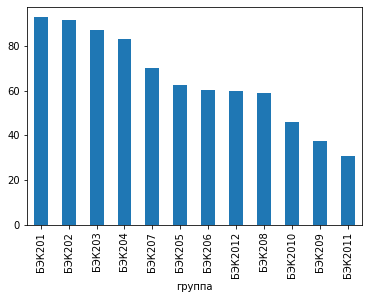

In [160]:
df_agg['hw01'].sort_values(ascending=False).plot(kind='bar');

## 6. Кодировка

Спросили про битые файлы и разные кодировки. 

__Краткий ответ:__ скорее всего файл либо в кодировке `utf-8` либо в `cp1251` и у вас она другая. Просто допишите опцию `encoding` и всё будет хорошо.

In [161]:
with open('message.txt', 'w', encoding='cp1251') as f:
    f.write('Привет!\nМаша!\nТы супер!\n')

In [164]:
with open('message.txt', 'r', encoding='cp1251') as f:
    s = f.read()
s

'Привет!\nМаша!\nТы супер!\n'

In [177]:
a = 'Мама мыла раму'
a = a.encode('utf-8')
a

b'\xd0\x9c\xd0\xb0\xd0\xbc\xd0\xb0 \xd0\xbc\xd1\x8b\xd0\xbb\xd0\xb0 \xd1\x80\xd0\xb0\xd0\xbc\xd1\x83'

In [178]:
a.decode('utf-8')

'Мама мыла раму'

# Вопросы

Как ввести матрицу без цикла

In [179]:
m = """1 2 3 
4 5 6
7 8 9"""

with open('input.txt', 'w') as f:
    f.write(m)

In [180]:
!cat input.txt

1 2 3 
4 5 6
7 8 9

In [181]:
with open('input.txt', 'r') as f:
    m = f.read()

In [192]:
import numpy as np
X = np.array(list(map(lambda w: w.split(), m.split('\n'))))
X = X.astype(float)
X

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

Сохранить можно также! Внутри `join` для разделения строк используйте `\n`

In [193]:
a = ['Маша', 'вау', 'крута']

print("\n".join(a))

Маша
вау
крута


In [194]:
print(" ".join(a))

Маша вау крута
